<a href="https://colab.research.google.com/github/serebris/LIS501_NLP_Quotes/blob/main/LIS501_NLP_Quotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Everything In

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
from matplotlib import pyplot as plt
from math import ceil
import numpy as np

Mounted at /content/drive


In [ ]:
#Read In CSV
df = pd.read_csv('/content/drive/My Drive/inspr.dataset.csv')

In [ ]:
# install nltk
!pip install nltk

# install spacy
!pip install spacy

# download the spacy en_core_web_sm model
!python -m spacy download en_core_web_sm-3.2.0 --direct

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-04-30 18:55:14.160384: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-30 18:55:15.288724: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
df.head()

NameError: ignored

# Data Preparation

In [ ]:
#lowercased word stems (removing punctuations and stop words)
import spacy
import re

nlp = spacy.load( 'en_core_web_sm', disable=["ner"] )

def clean(raw):
    # replace some tokens that cannot be handled by Spacy
    raw = re.sub( '\\s+', ' ', str(raw) )
    raw = re.sub( '&lt;', '<', str(raw) )
    raw = re.sub( '&gt;', '>', str(raw) )
    # only return lowercased word stems (removing punctuations and stop words)
    return [ token.lemma_.lower() for token in nlp(raw) if not token.is_stop and not token.is_punct ]

In [ ]:
#a Column of Cleaned Text appended to the Dataframe
df['Clean'] = df['Quote'].map(clean)

In [ ]:
#change the format of tokennized quotes to strings and keep only words which are longer than 1 letter
df['String'] = df['Clean'].apply(lambda x: ' '.join([item for item in x if len(item)>1]))

In [ ]:
df.head(3)

,Unnamed: 0,Category,Quote,Image-link,Quote-url,Clean,String
0,0,LOVE,Let us see what love can do.,https://assets.passiton.com/quotes/quote_artwo...,/inspirational-quotes/6900-let-us-see-what-lov...,"[let, love]",let love
1,1,LOVE,We can’t heal the world today. But we can begi...,https://assets.passiton.com/quotes/quote_artwo...,/inspirational-quotes/8169-we-can-t-heal-the-w...,"[heal, world, today, begin, voice, compassion,...",heal world today begin voice compassion heart ...
2,2,LISTENING,Listen with curiosity. Speak with honesty. Act...,https://assets.passiton.com/quotes/quote_artwo...,/inspirational-quotes/8083-listen-with-curiosi...,"[listen, curiosity, speak, honesty, act, integ...",listen curiosity speak honesty act integrity


# Measuring and visualizing similarity in text

In [ ]:
all_words = ' '.join([word for word in df['String']])
# joining all the word roots together

In [ ]:
import nltk
nltk.download('punkt')
tokenized_words = nltk.tokenize.word_tokenize(all_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#a frequency distribution which records the number of times each lemma has occurred
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist.most_common(50)

[('life', 290),
 ('thing', 207),
 ('love', 206),
 ('good', 167),
 ('world', 145),
 ('people', 119),
 ('know', 116),
 ('great', 112),
 ('heart', 109),
 ('live', 106),
 ('time', 91),
 ('find', 89),
 ('work', 87),
 ('way', 86),
 ('think', 80),
 ('come', 79),
 ('change', 72),
 ('dream', 71),
 ('hope', 69),
 ('like', 67),
 ('day', 65),
 ('joy', 65),
 ('kindness', 64),
 ('well', 64),
 ('let', 63),
 ('right', 63),
 ('soul', 62),
 ('want', 58),
 ('believe', 57),
 ('person', 56),
 ('make', 56),
 ('look', 54),
 ('peace', 54),
 ('human', 50),
 ('compassion', 48),
 ('learn', 48),
 ('true', 48),
 ('new', 47),
 ('matter', 47),
 ('need', 47),
 ('hard', 47),
 ('mind', 47),
 ('kind', 46),
 ('light', 46),
 ('courage', 45),
 ('listen', 44),
 ('feel', 44),
 ('help', 43),
 ('happiness', 43),
 ('moment', 42)]

* ('life', 290),
 ('thing', 207),
 ('love', 206),
 ('good', 167),
 ('world', 145),
 ('people', 119),
 ('know', 116),
 ('great', 112),
 ('heart', 109),
 ('live', 106) are the most used stems in the quotes

* Generating word cloud with tom 50 most used stems

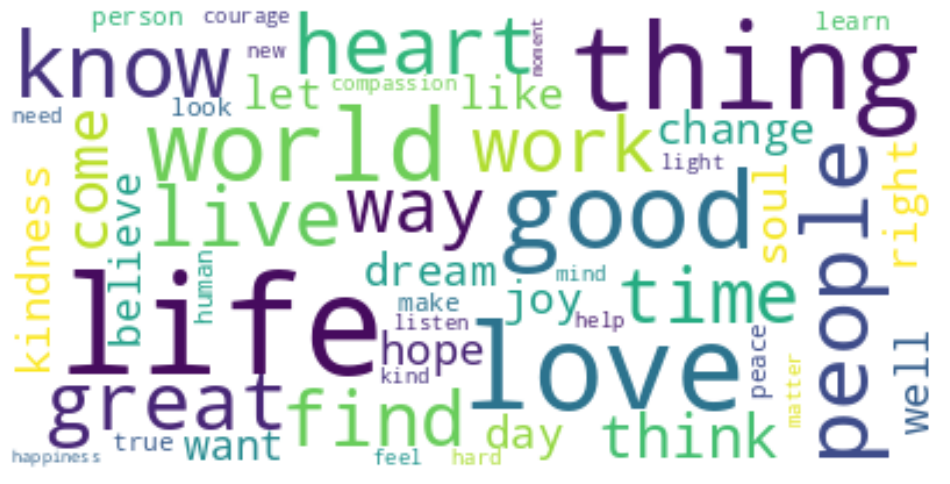

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define function to generate word cloud
def generate_wordcloud(data, max_words):
    wordcloud = WordCloud(max_words=max_words, background_color='white').generate_from_frequencies(data)
    return wordcloud

# Calculate word frequency
word_freq = df['String'].str.split(expand=True).stack().value_counts()

# Generate word cloud
wordcloud = generate_wordcloud(word_freq, max_words=50)

# Plot word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show plot
plt.show()


* Generating a bar chart with 20 most common stems

In [ ]:
most_common_words = fdist.most_common(20)
words, frequencies = zip(*most_common_words)

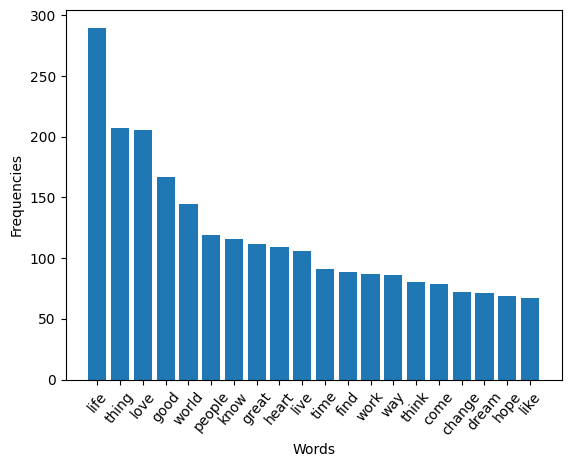

In [ ]:
plt.bar(words, frequencies)
plt.xticks(rotation=50)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.show()

# Unique Categories and Most mentioned

In [ ]:
df.Category.unique()

array(['LOVE', 'LISTENING', 'STEWARDSHIP', 'RESILIENCE', 'EXPLORING',
       'KINDNESS', 'HELPING OTHERS', 'OPTIMISM', 'GIVING',
       'COMMON GROUND', 'HOPE', 'ACHIEVEMENT', 'GRATITUDE', 'CHARITY',
       'PRACTICE', 'GET OUTSIDE', 'FORGIVENESS', 'CHARACTER', 'LAUGHTER',
       'HUMILITY', 'ACCEPTANCE', 'DEDICATION', 'BELIEVE IN YOURSELF',
       'SMILE', 'PEACE', 'PERSPECTIVE', 'LIVE YOUR DREAMS', 'CONFIDENCE',
       'INNOVATION', 'LEARNING', 'UNITY', 'DISCOVERY', 'SELFLESSNESS',
       'FITNESS', 'LEADERSHIP', 'FRIENDSHIP', 'CURIOSITY',
       'ENCOURAGEMENT', 'SPREAD YOUR WINGS', 'HARD WORK', 'LIVE LIFE',
       'JOY', 'WISDOM', 'PERSISTENCE', 'INSPIRATION', 'OVERCOMING',
       'CREATIVITY', 'FAMILY', 'CHEER', 'GIVING BACK', 'COMPASSION',
       'AMBITION', 'LOYALTY', 'GRIT', 'EDUCATION', 'APPRECIATING NATURE',
       'INTEGRITY', 'EMPATHY', 'SELF-CARE', 'TEAMWORK',
       'INCLUDING OTHERS', 'COURAGE', 'PERSEVERANCE', 'APPRECIATION',
       'MOTIVATION', 'MENTORING', 'HUMOR', '

In [ ]:
# count no. of unique values in Category column
n = df.Category.nunique()

print("No.of.unique values in Category column :",
      n)

No.of.unique values in Category column : 116


In [ ]:
#top 10 most mentioned categories
c = df['Category'].value_counts().nlargest(10)
print(c)

LOVE                   54
HOPE                   41
KINDNESS               39
BELIEVE IN YOURSELF    37
GRATITUDE              30
OPTIMISM               29
COURAGE                29
SPREAD YOUR WINGS      29
COMPASSION             28
JOY                    28
Name: Category, dtype: int64


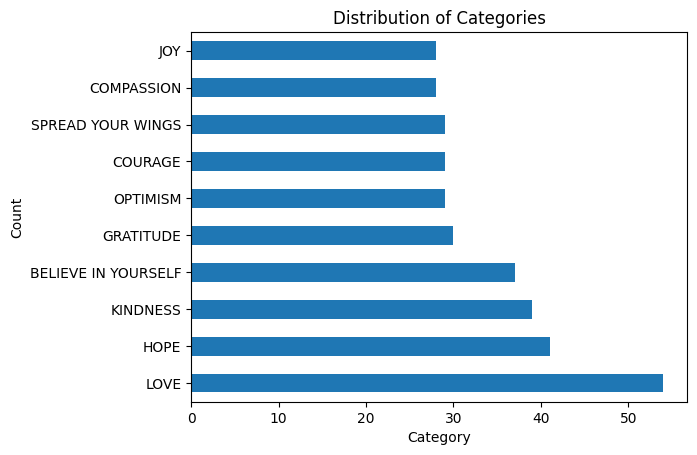

<Figure size 2000x1600 with 0 Axes>

In [ ]:
# Generate histogram
df['Category'].value_counts().nlargest(10).plot(kind='barh')

# Add x-axis label
plt.xlabel('Category')

# Add y-axis label
plt.ylabel('Count')

# Add chart title
plt.title('Distribution of Categories')

# Increase font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust chart size
plt.figure(figsize=(20,16))

# Show chart
plt.show()

# Unsupervised Topic Modeling: use Gensim to train LDA topic models

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/ - great article on LDA models.

In [ ]:
# install gensim
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = nltk.corpus.stopwords.words('english')

wtk = nltk.tokenize.RegexpTokenizer(r'\w+')
wnl = nltk.stem.wordnet.WordNetLemmatizer()

def normalize_corpus(quotes):
    norm_Quotes = []
    for quote in quotes:
        quote = quote.lower()
        quote_tokens = [token.strip() for token in wtk.tokenize(quote)] #Return a copy of the string S with leading and trailing whitespace removed.
        quote_tokens = [wnl.lemmatize(token) for token in quote_tokens if not token.isnumeric()] #lemmatize strings numbers
        quote_tokens = [token for token in quote_tokens if len(token) > 1] #remove single character tokens
        quote_tokens = [token for token in quote_tokens if token not in stop_words] #remove stop words
        quote_tokens = list(filter(None, quote_tokens))
        if quote_tokens:
            norm_Quotes.append(quote_tokens)
    return norm_Quotes

norm_Quotes = normalize_corpus(df['Quote'])
print(len(norm_Quotes))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


1745


In [ ]:
# preview of the first 5 quotes(up to 10 stems)
print(norm_Quotes[:4][:10])

[['let', 'see', 'love'], ['heal', 'world', 'today', 'begin', 'voice', 'compassion', 'heart', 'love', 'act', 'kindness'], ['listen', 'curiosity', 'speak', 'honesty', 'act', 'integrity'], ['basic', 'powerful', 'way', 'connect', 'another', 'person', 'listen', 'listen']]


In [ ]:
df.head()

,Unnamed: 0,Category,Quote,Image-link,Quote-url
0,0,LOVE,Let us see what love can do.,https://assets.passiton.com/quotes/quote_artwo...,/inspirational-quotes/6900-let-us-see-what-lov...
1,1,LOVE,We can’t heal the world today. But we can begi...,https://assets.passiton.com/quotes/quote_artwo...,/inspirational-quotes/8169-we-can-t-heal-the-w...
2,2,LISTENING,Listen with curiosity. Speak with honesty. Act...,https://assets.passiton.com/quotes/quote_artwo...,/inspirational-quotes/8083-listen-with-curiosi...
3,3,LISTENING,The most basic and powerful way to connect to ...,https://assets.passiton.com/quotes/quote_artwo...,/inspirational-quotes/7139-the-most-basic-and-...
4,4,LISTENING,"Knowledge speaks, but wisdom listens.",https://assets.passiton.com/quotes/quote_artwo...,/inspirational-quotes/8376-knowledge-speaks-bu...


* It is very interesting to see how a diffrent cleaning pipeline outputs somewhat altered result for stems. NLTK leaves more stems to analyze.

In [ ]:
import gensim

Q_bigrams = gensim.models.Phrases(norm_Quotes, min_count=20, threshold=20, delimiter='_') # higher threshold fewer phrases.
Q_bigrams_model = gensim.models.phrases.Phraser(Q_bigrams)

print(Q_bigrams_model[norm_Quotes[1]][:10])

['heal', 'world', 'today', 'begin', 'voice', 'compassion', 'heart', 'love', 'act', 'kindness']


In [ ]:
norm_quotes_bigrams = [Q_bigrams_model[quote] for quote in norm_Quotes]

# Create a dictionary representation of the documents.
dictionary = gensim.corpora.Dictionary(norm_quotes_bigrams)
print('Sample word to number mappings:', list(dictionary.items())[:15])
print('Total Vocabulary Size:', len(dictionary))

Sample word to number mappings: [(0, 'let'), (1, 'love'), (2, 'see'), (3, 'act'), (4, 'begin'), (5, 'compassion'), (6, 'heal'), (7, 'heart'), (8, 'kindness'), (9, 'today'), (10, 'voice'), (11, 'world'), (12, 'curiosity'), (13, 'honesty'), (14, 'integrity')]
Total Vocabulary Size: 3076


In [ ]:
###### Not needed to filter in this instance, but a possibility ########

# Filter out words that occur less than in 20 documents, or more than 50% of the documents.
#dictionary.filter_extremes(no_below=20, no_above=0.6)
#print('Total Vocabulary Size:', len(dictionary))

Total Vocabulary Size: 147


In [ ]:
# Transforming articles corpus into bag of words vectors
bow_quotes = [dictionary.doc2bow(text) for text in norm_quotes_bigrams]
print(bow_quotes[1][:10])

[(1, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)]


In [ ]:
print([(dictionary[idx] , freq) for idx, freq in bow_quotes[1][:10]])

[('love', 1), ('act', 1), ('begin', 1), ('compassion', 1), ('heal', 1), ('heart', 1), ('kindness', 1), ('today', 1), ('voice', 1), ('world', 1)]


* Model

In [ ]:
import logging

# you can turn on the debug information such that you know your model is still being trained (it takes a while to train a model)
logging.basicConfig( format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO )

#Specify the Number of Topics
TOTAL_TOPICS_G = 20

# Iterations = the number of times to iterate each document in a single pass (the default number of iteration is 50)
# Alpha = can be set to an explicit array = prior of your choice. It also support special values of `‘asymmetric’ and ‘auto’: the former uses a fixed normalized asymmetric 1.0/topicno prior, the latter learns an asymmetric prior directly from your data.



lda_model_Gquotes = gensim.models.LdaModel(corpus=bow_quotes, id2word=dictionary, chunksize=1740,
                                   alpha='auto', eta='auto', random_state=42,
                                   iterations=500, num_topics=TOTAL_TOPICS_G,
                                   passes=20, eval_every=None)

In [ ]:
for topic_id, topic in lda_model_Gquotes.print_topics(num_topics=20, num_words=20):
    print('Topic #'+str(topic_id+1)+':')
    print(topic)
    print()

Topic #1:
0.225*"love" + 0.215*"people" + 0.192*"something" + 0.171*"respond" + 0.002*"opportunity" + 0.002*"point" + 0.002*"plan" + 0.001*"degree" + 0.001*"water" + 0.001*"solve" + 0.001*"treated" + 0.001*"comparison" + 0.001*"unique" + 0.001*"trial" + 0.001*"anybody" + 0.001*"look" + 0.001*"steam" + 0.001*"baby" + 0.001*"grand" + 0.001*"developed"

Topic #2:
0.423*"piece" + 0.008*"succeed" + 0.007*"either" + 0.007*"equality" + 0.005*"matter" + 0.005*"guide" + 0.005*"realize" + 0.004*"would" + 0.004*"much" + 0.004*"country" + 0.004*"taught" + 0.004*"energy" + 0.003*"regarding" + 0.003*"essential" + 0.003*"including" + 0.003*"empty" + 0.003*"happier" + 0.003*"mere" + 0.003*"ahead" + 0.003*"secret"

Topic #3:
0.024*"try" + 0.024*"go" + 0.017*"away" + 0.016*"together" + 0.014*"mean" + 0.014*"heart" + 0.012*"smile" + 0.012*"give" + 0.010*"exercise" + 0.010*"path" + 0.009*"eye" + 0.009*"grateful" + 0.009*"one" + 0.009*"good" + 0.009*"let" + 0.009*"meaning" + 0.008*"different" + 0.008*"fail

In [ ]:
# storing the trained LDA topic model
from gensim.test.utils import datapath

path = datapath('/content/drive/My Drive/LDA_quotesModel')
lda_model_Gquotes.save( path )

# Visualizing LDA Model

In [ ]:
!pip install pyLDAvis==2.1.2

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97736 sha256=7a930722523548b151414ef07c04c62040e1653f26a1199621ba62080ec0ec6e
  Stored in directory: /root/.cache/pip/wheels/d9/93/d6/16c95da19c32f037fd75135ea152d0df37254c25cd1a8b4b6c
Successfully built pyLDAvis


In [ ]:
vis = pyLDAvis.gensim.prepare(lda_model_Gquotes, bow_quotes, dictionary)
vis

/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.185717  0.036540       1        1  12.233836
17     0.168146  0.050227       2        1  11.843401
16     0.159328  0.023827       3        1  11.004911
18     0.149343  0.024160       4        1  10.350804
5      0.156108  0.016130       5        1   9.604081
13     0.118161  0.006791       6        1   6.532783
19    -0.201735 -0.163708       7        1   4.470765
2      0.123711  0.002688       8        1   4.422946
11     0.067121 -0.020233       9        1   4.250011
0     -0.137426 -0.140304      10        1   3.357255
4      0.083215 -0.029202      11        1   3.225435
7     -0.130849 -0.140106      12        1   3.101334
8     -0.151363  0.184914      13        1   2.353523
15     0.018631 -0.041220      14        1   2.283343
14    -0.165694 -0.150225      15        1   2.223304
6     -0.091492 -0.053730      16        1   2.175496
1      0.010485 -0.047955      17        1   1.899754
9     -0.211999  0.289997      18        1   1.893275
3     -0.161242  0.196450      19        1   1.583488
10     0.011833 -0.045039      20        1   1.190256, topic_info=           Term        Freq       Total Category  logprob  loglift
1523    pattern  213.000000  213.000000  Default  30.0000  30.0000
526        idea  152.000000  152.000000  Default  29.0000  29.0000
1595      piece  132.000000  132.000000  Default  28.0000  28.0000
1          love  152.000000  152.000000  Default  27.0000  27.0000
38    something  168.000000  168.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
262        feel    0.252601   29.763762  Topic20  -6.6490  -0.3382
388        easy    0.237209    7.429841  Topic20  -6.7119   0.9867
1030       made    0.230345   15.105969  Topic20  -6.7412   0.2477
1034        egg    0.229527    1.404355  Topic20  -6.7448   2.6197
833     boiling    0.229527    1.367316  Topic20  -6.7448   2.6464

[964 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
291       2  0.474950     ability
291       5  0.203550     ability
291      11  0.271400     ability
449      11  0.572635  acceptance
449      13  0.190878  acceptance
...     ...       ...         ...
541       8  0.061234        year
1083      4  0.734058         yes
771      14  0.683155   yesterday
237      11  0.780203         yet
237      14  0.195051         yet

[1180 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 18, 17, 19, 6, 14, 20, 3, 12, 1, 5, 8, 9, 16, 15, 7, 2, 10, 4, 11])

# Motivational quote generation using LSTM

In [ ]:
import tensorflow.keras.utils as ku
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


In [ ]:
df['Quote'] = df['Quote'].str.split(';').str.join(',')

print(df['Quote'].to_string())

0                           Let us see what love can do. 
1       We can’t heal the world today. But we can begi...
2       Listen with curiosity. Speak with honesty. Act...
3       The most basic and powerful way to connect to ...
4                  Knowledge speaks, but wisdom listens. 
5       Deep listening is the kind of listening that c...
6       Every person in this life has something to tea...
7       There are no problems we cannot solve together...
8       I always wondered why somebody didn’t do somet...
9       Let us develop respect for all living things. ...
10      We say 'things will turn out', but no. It's wh...
11      When one tugs at a single thing in nature, one...
12      Do not judge me by my success, judge me by how...
13      I can be changed by what happens to me. But I ...
14      Don’t let a bad day trick you into thinking yo...
15      Like tiny seeds with potent power to push thro...
16      Hardships often prepare ordinary people for an...
17            

In [ ]:
corpus = df['Quote'].str.split(';').str.join(',')

In [ ]:
print(corpus[:10])

0                        Let us see what love can do. 
1    We can’t heal the world today. But we can begi...
2    Listen with curiosity. Speak with honesty. Act...
3    The most basic and powerful way to connect to ...
4               Knowledge speaks, but wisdom listens. 
5    Deep listening is the kind of listening that c...
6    Every person in this life has something to tea...
7    There are no problems we cannot solve together...
8    I always wondered why somebody didn’t do somet...
9    Let us develop respect for all living things. ...
Name: Quote, dtype: object


* Source:
https://www.geeksforgeeks.org/lstm-based-poetry-generation-using-nlp-in-python/#

In [ ]:
# Fitting the Tokenizer on the Corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# Vocabulary count of the corpus
total_words = len(tokenizer.word_index)

print("Total Words:", total_words)

Total Words: 3763


In [ ]:
# Converting the text into embeddings
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]

    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences,
                                         maxlen=max_sequence_len,
                                         padding='pre'))
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes=total_words+1)

In [ ]:
# Building a Bi-Directional LSTM Model
model = Sequential()
model.add(Embedding(total_words+1, 100,
                    input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(total_words+1/2, activation='relu',
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words+1, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 114, 100)          376400    
                                                                 
 bidirectional (Bidirectiona  (None, 114, 100)         60400     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 114, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 3763)              191913    
                                                                 
 dense_1 (Dense)             (None, 3764)              14167696  
                                                        

In [ ]:
# model training
history = model.fit(predictors, label, epochs=50, verbose=1)

Epoch 1/50
1060/1060 [==============================] - 546s 508ms/step - loss: 6.3120 - accuracy: 0.0480
Epoch 2/50
1060/1060 [==============================] - 534s 503ms/step - loss: 5.9342 - accuracy: 0.0619
Epoch 3/50
1060/1060 [==============================] - 528s 498ms/step - loss: 5.7193 - accuracy: 0.0808
Epoch 4/50
1060/1060 [==============================] - 542s 512ms/step - loss: 5.5711 - accuracy: 0.0918
Epoch 5/50
1060/1060 [==============================] - 543s 512ms/step - loss: 5.4587 - accuracy: 0.1038
Epoch 6/50
1060/1060 [==============================] - 542s 512ms/step - loss: 5.3567 - accuracy: 0.1166
Epoch 7/50
1060/1060 [==============================] - 540s 509ms/step - loss: 5.2579 - accuracy: 0.1284
Epoch 8/50
1060/1060 [==============================] - 541s 510ms/step - loss: 5.1585 - accuracy: 0.1366
Epoch 9/50
1060/1060 [==============================] - 565s 533ms/step - loss: 5.0592 - accuracy: 0.1439
Epoch 10/50
1060/1060 [=======================

* Generating Text using the Built Model

In [ ]:
seed_text = "Friends"
next_words = 4
ouptut_text = ""

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

Friends are the most vital


In [ ]:
seed_text = "Encourage others"
next_words = 10
ouptut_text = ""

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1,
      padding='pre')
    predicted = np.argmax(model.predict(token_list,
                                        verbose=0), axis=-1)
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

Encourage others and perseverance from nature it’s sorely lands but in order
